In [1]:
#IMPORTAZIONE LIBRERIE 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut,  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from packages.utils import standard_OHE

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
#LETTURA FILE CSV
url_AIDS_Classification = r'.\data\AIDS_Classification_5000.csv'
df = pd.read_csv(url_AIDS_Classification)
print(df.head())

   time  trt  age   wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   988    2   42 71.761     0     0      0     100       0    1  ...     1   
1   413    3   30 72.676     0     1      0     100       0    1  ...     0   
2  1119    0   37 73.755     0     1      0      90       0    1  ...     1   
3   680    3   34 70.038     0     0      0     100       0    0  ...     0   
4  1043    3   35 63.028     0     0      0     100       0    1  ...     0   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0      3        0      0       0   290    408  1870   1671         0  
1      1        0      0       0   506    446  1372    523         0  
2      3        0      0       0   499    542   609   1474         0  
3      1        0      1       0   313    478   780    987         0  
4      1        0      1       0   337    761   698   1735         0  

[5 rows x 23 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [4]:
#DATI MANCANTI

missing_values = df.isnull().sum()
print(missing_values)

# non ci sono dati mancanti

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [5]:
#DUPLICATI

duplicati = df.duplicated().sum()
print(duplicati)
# non ci sono duplicati
# df_cleaned = df.drop_duplicates()

0


In [6]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [7]:
# SOSTIUIRE NOME DELLE COLONNE

#df.columns
#df.columns = ['nuovo_nome1', 'nuovo_nome2', 'nuovo_nome3', '...']
#deve avere lo stesso numero di colonne rispetto al dataset originale oppure utilizza rename() di pandas

In [8]:
df.head()
# CONVERTIRE LE VARIABILI DUMMY
#df_dummies = pd.get_dummies(df, columns=['hemo', 'homo'], drop_first=True)
#va completata con le altre dummy, son già intere, non è necessario

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.761,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.676,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.755,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.038,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.028,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


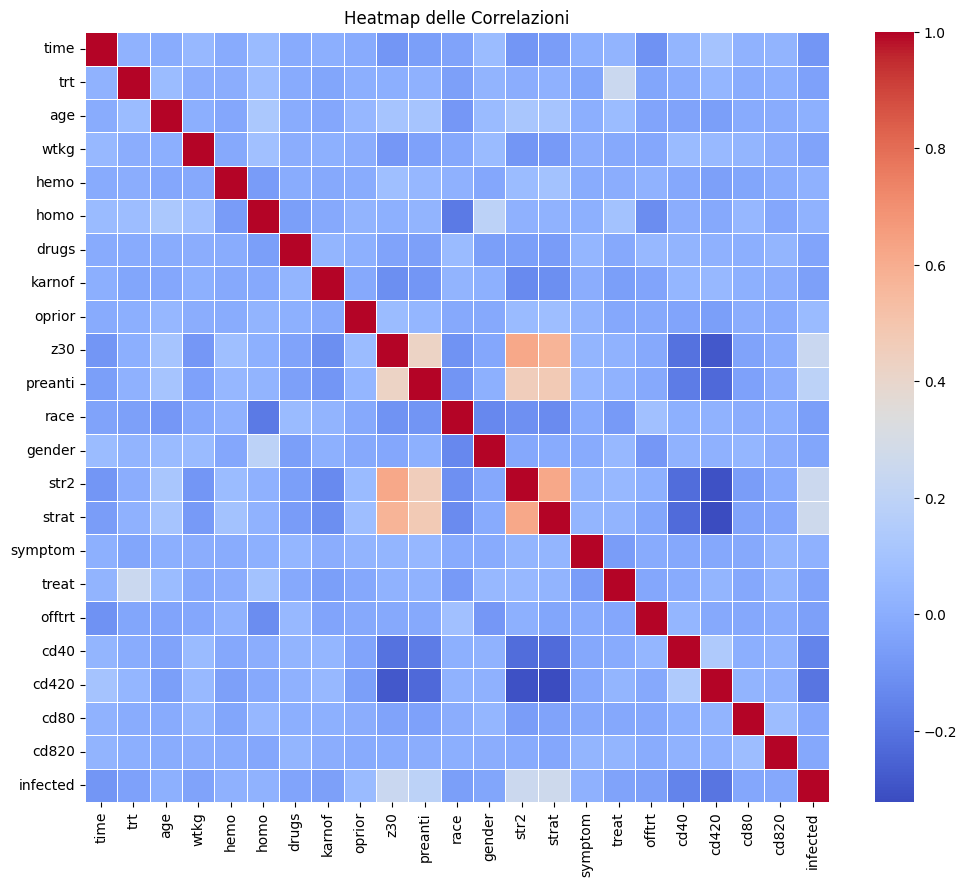

In [9]:
# MATRICE DI CORRELAZIONE

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap delle Correlazioni') 
plt.show()


In [10]:
#DEFINIRE X E Y

X = df.drop(columns='infected')
y = df.infected

In [11]:
# Numerical columns

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns.to_list())

['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


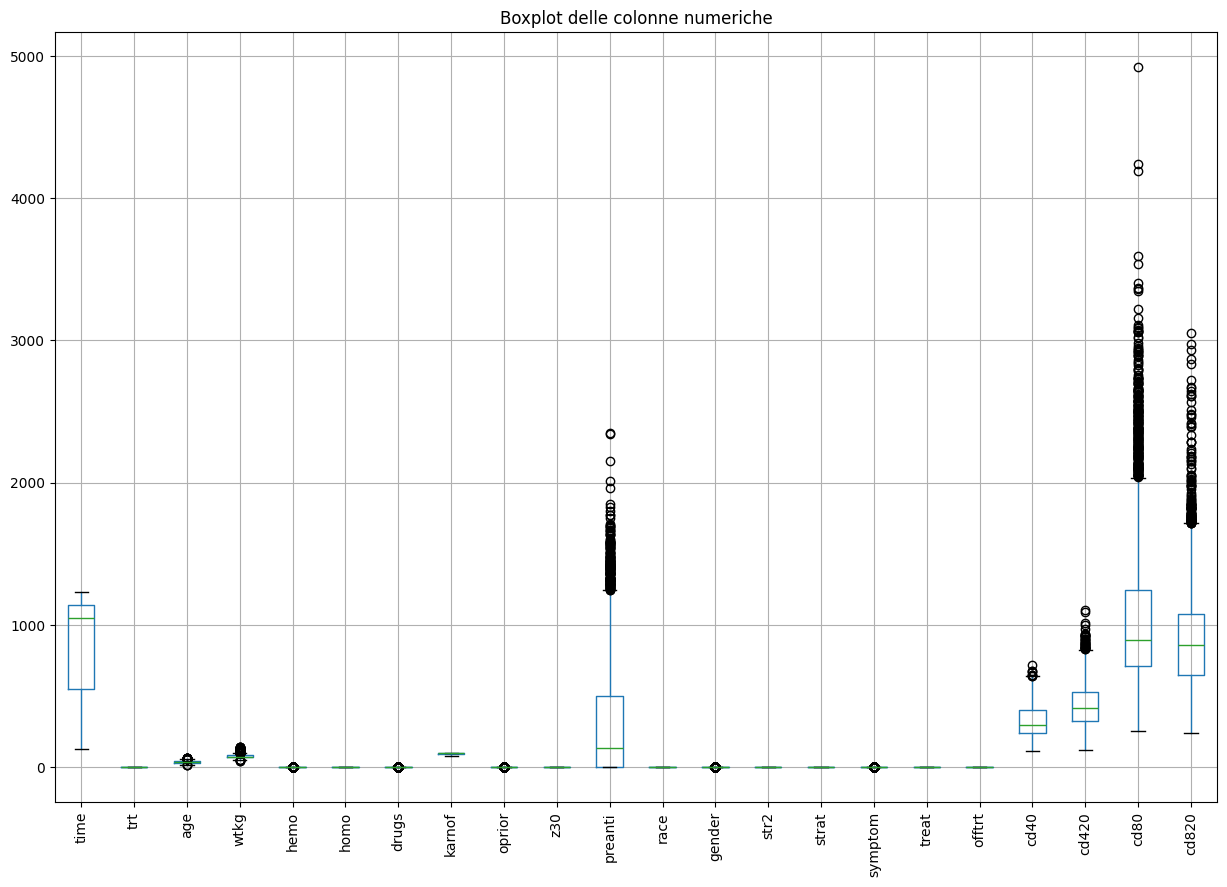

In [12]:
# Boxplot

plt.figure(figsize=(15, 10))
X[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [13]:
X_num = X[numeric_columns]

# Rimozione colonne binarie e normalizzazione

num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()

,time,trt,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,cd820
0,0.780,0.667,0.600,0.278,1.000,0.387,1.000,0.291,0.293,0.346,0.509
1,0.261,1.000,0.360,0.287,1.000,0.176,0.000,0.651,0.332,0.240,0.102
2,0.899,0.000,0.500,0.298,0.545,0.345,1.000,0.639,0.429,0.076,0.439
3,0.502,1.000,0.440,0.260,1.000,0.000,0.000,0.329,0.364,0.113,0.266
4,0.830,1.000,0.460,0.189,1.000,0.001,0.000,0.369,0.652,0.096,0.532


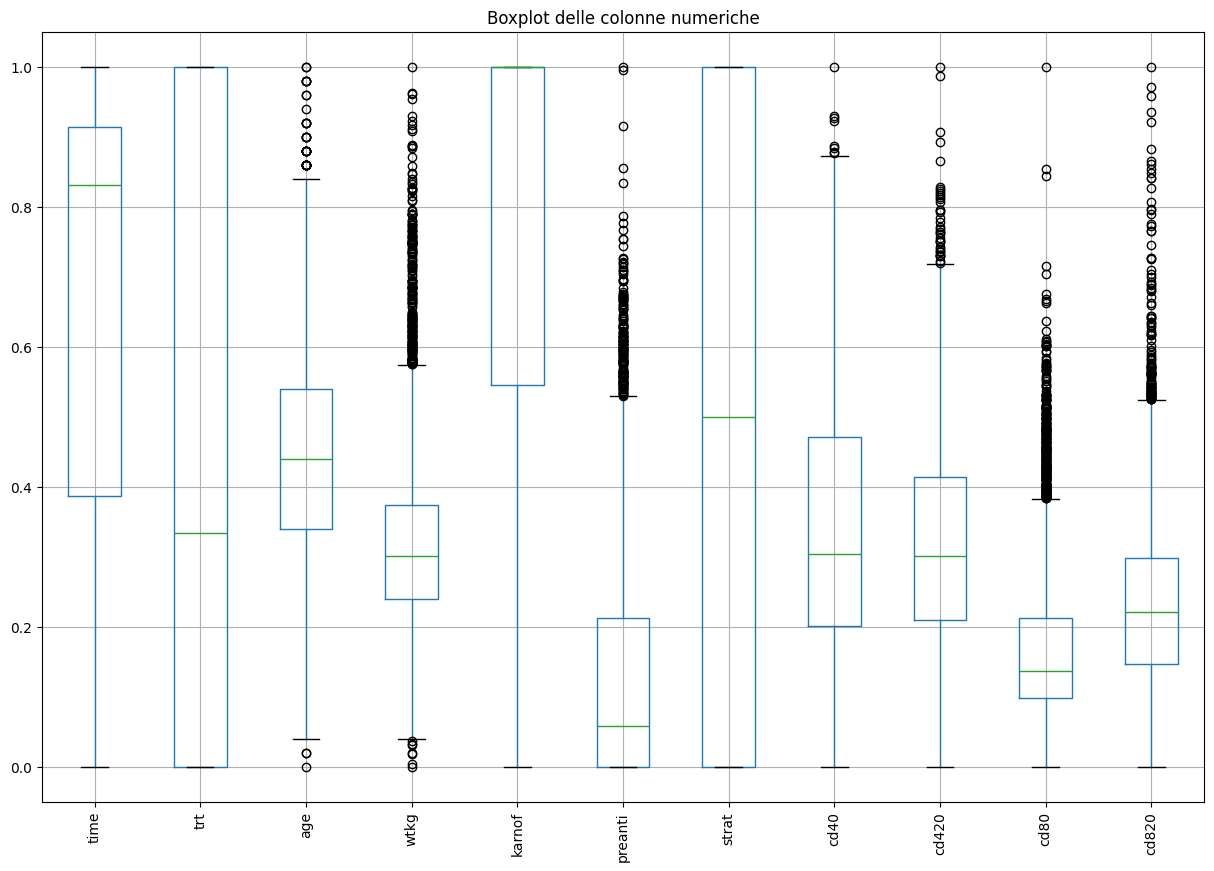

In [14]:
# Boxplot normalizzato e senza colonne binarie

plt.figure(figsize=(15, 10))
normalized_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [15]:
# Bilanciamento infetti-non infetti (under-sampling)

df_pos= df[df["infected"] == 1]
desired_dimension = round(df_pos.shape[0]/4*6)

df_neg = df[df["infected"] == 0]
df_neg = df_neg.sample(n = desired_dimension, random_state = 42)
df = pd.concat([df_pos, df_neg])
df.shape

(3947, 23)

In [16]:
# One-Hot Encoding

df = standard_OHE(df)

In [17]:
# DEFINIRE X E Y

X = df.drop(columns='infected')
y = df.infected
X

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
7,1061,2,36,60.915,0,0,0,90,0,0,...,0,0,3,0,0,0,232,295,1985,1407
9,553,1,46,62.112,0,0,0,90,0,0,...,0,0,3,0,0,0,268,182,1317,959
21,1081,0,27,71.467,0,0,0,100,0,1,...,0,1,1,1,1,0,315,358,509,444
26,317,0,38,83.494,0,0,0,100,0,0,...,0,0,3,0,1,1,329,222,833,471
39,550,0,27,80.650,0,1,0,100,0,0,...,0,0,2,0,0,0,154,921,1025,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,372,3,36,73.660,0,1,1,100,0,0,...,0,0,3,0,0,0,156,280,575,751
1665,927,2,31,67.066,0,1,0,100,0,0,...,0,0,1,0,0,1,360,316,1045,473
3233,1019,2,33,84.412,0,0,0,100,0,1,...,0,1,1,1,0,0,490,634,1076,660
601,1154,3,34,73.948,0,1,0,90,0,1,...,0,1,1,0,0,1,292,335,1005,1659


In [18]:
# DIVISIONE DATASET IN TRAIN E TEST

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3157, 22)
(790, 22)


In [19]:
# REGRESSIONE LOGISTICA

clf = skl_lm.LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [20]:
# RFE

def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]


In [21]:
# SELECT K-BEST

def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

# Ciclo per rfe
Facciamo un ciclo per k. Andiamo quindi a far assumere alla variabile k valori da 1 (il minimo di feature che può avere un modello) fino al numero di variabili che abbiamo a disposizione "len(X.columns)". NB: il "+1" serve a farci selezionare anche il numero esatto delle colonne del dataset

In [22]:
# RFE LOOP 

accuracies_rfe = []

for k in tqdm(range(1,len(X.columns)+1)): 
    
     # selezioniamo le k variabili
    X_selected = rfe_selection(X=X_train, y=y_train, k=k)
    
    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(X_selected)
    
    # facciamo il fitting del modello 
    model = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)
    
    # trasformiamo le probabilità in variabili binarie (0-1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)
    
    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)
  

100%|██████████| 22/22 [00:02<00:00,  7.64it/s]


In [23]:
# DEFINIAMO K PER RFE

k_rfe = 6

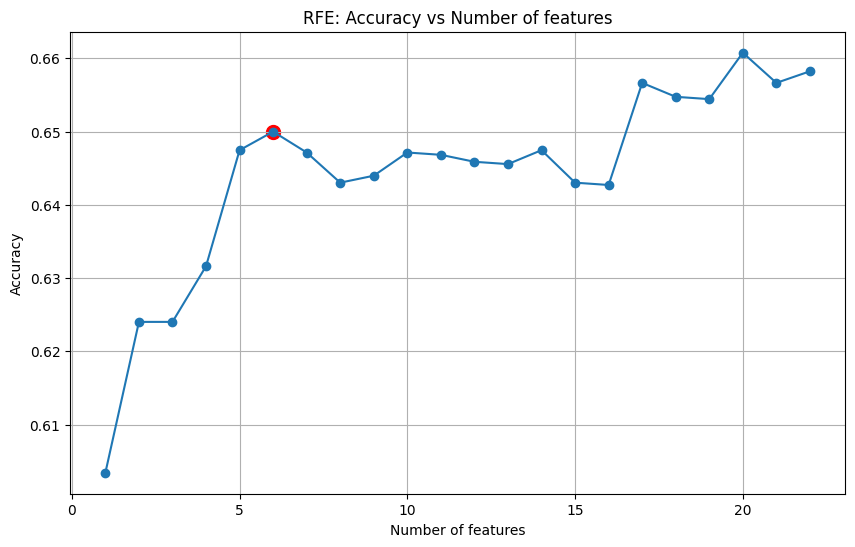

In [24]:
# Plot accuracies RFE

plt.figure(figsize=(10, 6))
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train.columns)+1), accuracies_rfe, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RFE: Accuracy vs Number of features')
plt.grid()
plt.show()

In [25]:
# SKB LOOP 

accuracies_skb = []

for k in tqdm(range(1,len(X.columns)+1)): 
    # selezioniamo le k variabili
    X_selected = skb_selection(X=X_train, y=y_train, k=k)
    
    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(X_selected)
    
    # facciamo il fitting del modello 
    model = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)
    
    # trasformiamo le probabilità in variabili binarie (0-1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)
    
    # lo aggiungiamo alla lista 
    accuracies_skb.append(accuracy)
    

100%|██████████| 22/22 [00:00<00:00, 44.57it/s]


In [26]:
# DEFINIAMO K PER SKB

k_skb = 4

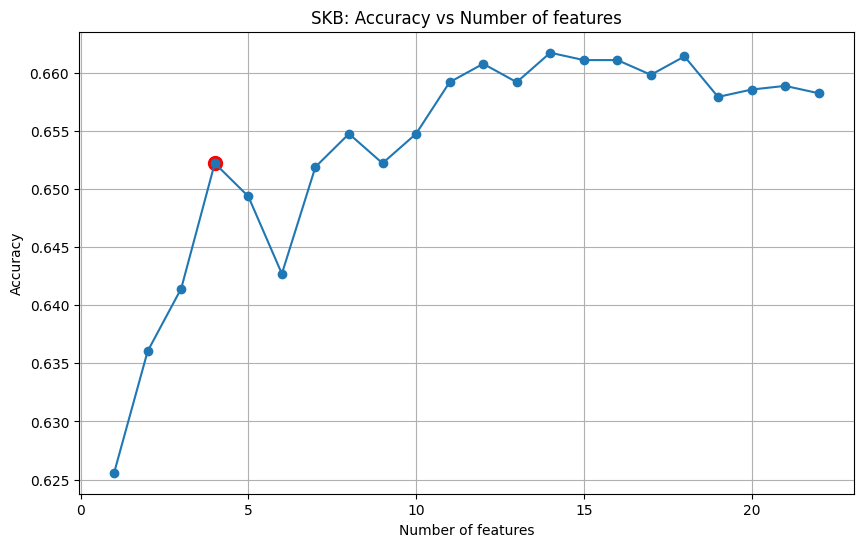

In [27]:
#Plot accuracies SKB

plt.figure(figsize=(10, 6))
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train.columns)+1), accuracies_skb, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('SKB: Accuracy vs Number of features')
plt.grid()
plt.show()

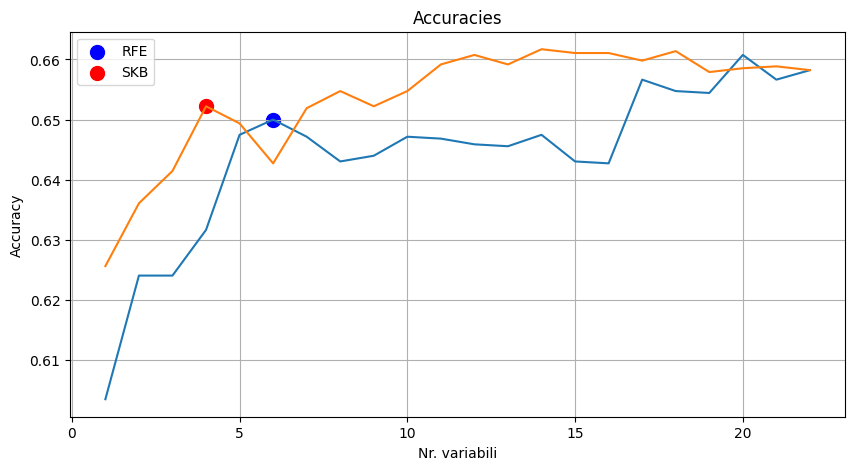

In [58]:
#Plot accuracies RFE e SKB a confronto

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X_train.columns)+1), accuracies_rfe)
plt.plot(range(1, len(X_train.columns)+1), accuracies_skb)
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='blue', label='RFE', s=100)
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='SKB', s=100)
plt.title('Accuracies') 
plt.xlabel('Nr. variabili')
plt.ylabel('Accuracy')
plt.grid()
plt.legend() 
plt.show()

In [29]:
# Variabili selezionate RFE

X_selected_rfe = rfe_selection(X=X_train,y=y_train,k=k_rfe)
rfe_vars = X_selected_rfe.columns
rfe_vars

Index(['drugs', 'oprior', 'z30', 'str2', 'strat', 'treat'], dtype='object')

In [30]:
# Variabili selezionate SKB

X_selected_skb = skb_selection(X=X_train,y=y_train,k=k_skb)
skb_vars = X_selected_skb.columns
skb_vars

Index(['z30', 'str2', 'strat', 'cd420'], dtype='object')

In [31]:
# Addestriamo le variabili selezionate da RFE e SKB

X_train_skb = X_train[skb_vars]
X_train_rfe = X_train[rfe_vars]

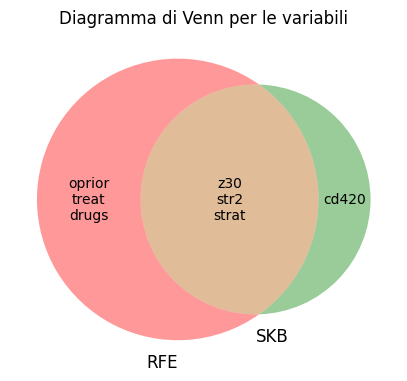

In [60]:
# DIAGRAMMA DI VENN

rfe_cols = list(X_train_rfe.columns)
skb_cols = list(X_train_skb.columns)

set1 = set(rfe_cols)
set2 = set(skb_cols)

# Crea il diagramma di Venn
plt.figure(figsize=(5, 5))
venn_diagram = venn2([set1, set2], ('RFE', 'SKB'))

# Assegna i nomi delle parole alle etichette nelle aree corrispondenti del diagramma di Venn
venn_diagram.get_label_by_id('10').set_text('\n'.join(set1 - set2))
venn_diagram.get_label_by_id('11').set_text('\n'.join(set1 & set2))
venn_diagram.get_label_by_id('01').set_text('\n'.join(set2 - set1))

# Mostra il grafico
plt.title("Diagramma di Venn per le variabili")
plt.show()

In [33]:
# LOOCV
def loocv(X, y):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    return scores.mean()

In [34]:
# LOOCV RFE
accuracy_rfe = loocv(X_train_rfe, y_train)
print(f"Accuracy with RFE: {accuracy_rfe}")

# LOOCV SKB
accuracy_skb = loocv(X_train_skb, y_train)
print(f"Accuracy with SKB: {accuracy_skb}")

Accuracy with RFE: 0.6458663287931581
Accuracy with SKB: 0.6496674057649667


In [35]:
# TEST SET RFE 

def rfe_logistic_regression(X, y):

    # Select the choosen features with RFE
    rfe_cols = rfe_selection(X=X_train, y=y_train, k=k_rfe).columns
    x_selected = X[rfe_cols]
    X_train_w_intercept = sm.add_constant(x_selected)

    # Fit the model
    model = sm.Logit(y.to_numpy(),X_train_w_intercept).fit(disp=False)

    # Predict probabilities
    y_pred = model.predict(X_train_w_intercept)

    # Transform probabilities to binary values
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y, y_pred)
    return model, accuracy

model, accuracy = rfe_logistic_regression(X_test, y_test)
print(accuracy)

0.6582278481012658


In [36]:
# TEST SET SKB

def skb_logistic_regression(X, y):

    # Select the choosen features with SelectKBest
    skb_cols = skb_selection(X=X_train, y=y_train, k=k_skb).columns
    x_selected = X[skb_cols]
    X_train_w_intercept = sm.add_constant(x_selected)

    # Fit the model
    model = sm.Logit(y.to_numpy(),X_train_w_intercept).fit(disp=False)

    # Predict probabilities
    y_pred = model.predict(X_train_w_intercept)

    # Transform probabilities to binary values
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y, y_pred)
    return model, accuracy

model, accuracy = skb_logistic_regression(X_test, y_test)
print(accuracy)

0.669620253164557


# PCA

## STANDARDIZZAZIONE

In [37]:
# STANDARDIZZAZIONE

# Select numerical columns
X_train_num = X_train.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(X_train_num)
df_standardized = pd.DataFrame(df_standardized, columns=X_train_num.columns)
df_standardized.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,-0.888,0.497,-1.344,-0.640,-0.190,-0.727,-0.399,0.624,-0.201,1.382,...,2.376,1.214,-1.102,-0.297,-0.604,-0.700,-1.114,1.017,0.267,0.612
1,0.744,1.303,0.809,-0.994,-0.190,-0.727,-0.399,-1.367,-0.201,-0.724,...,-0.421,1.214,0.021,-0.297,1.655,-0.700,0.649,-0.101,1.508,0.447
2,0.333,-1.115,-0.340,-0.405,-0.190,1.376,-0.399,0.624,-0.201,-0.724,...,2.376,1.214,-1.102,-0.297,1.655,1.429,-0.252,-0.431,-1.233,-0.885
3,0.113,-0.309,0.091,-0.079,-0.190,-0.727,-0.399,-1.168,-0.201,-0.724,...,-0.421,-0.824,0.021,-0.297,-0.604,1.429,0.620,0.279,0.179,0.612
4,0.820,-1.115,0.665,-0.790,-0.190,-0.727,-0.399,0.624,-0.201,-0.724,...,-0.421,-0.824,1.144,-0.297,1.655,1.429,-0.223,0.433,1.670,-0.416


In [38]:
# Fit the PCA

pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)

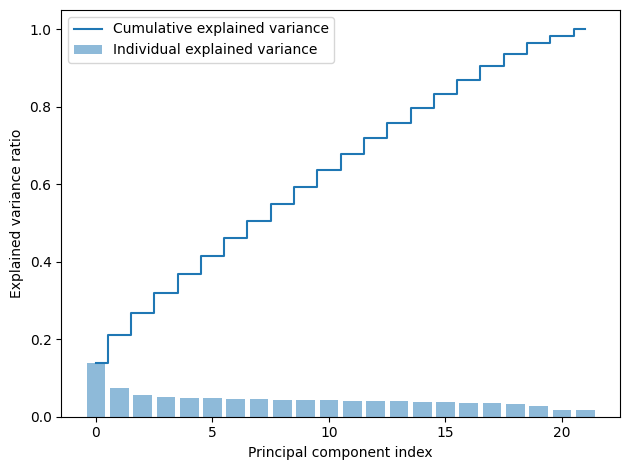

In [39]:
# SCREE PLOT

# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [40]:
# Find index where cumulative explained variance is greater than a threshold
desidered_explained_variance = 0.7
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Number of components explaining {desidered_explained_variance}% of variance: {index_selected}')

Number of components explaining 0.7% of variance: 13


In [41]:
# Prepare x_test
x_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Transform the test data
x_test_new = pca.transform(x_test_scaled)

In [42]:
# Make regression model on PCA

X_pca = x_new[:, :index_selected]
print(X_pca.shape)
print(y_train.shape)

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)
X_test_pca = x_test_new[:, :index_selected]

# Fit the model
model = LogisticRegression()
model.fit(X_pca, y_train)

# Predict the model
y_pred = model.predict(X_test_pca)

# Calculate the accuracy
new_accuracy = metrics.accuracy_score(y_test, y_pred)
new_accuracy

(3157, 13)
(3157,)


0.6544303797468355

# DECISION TREE

In [43]:
# Model definition
model = DecisionTreeClassifier(random_state=42)


# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.56


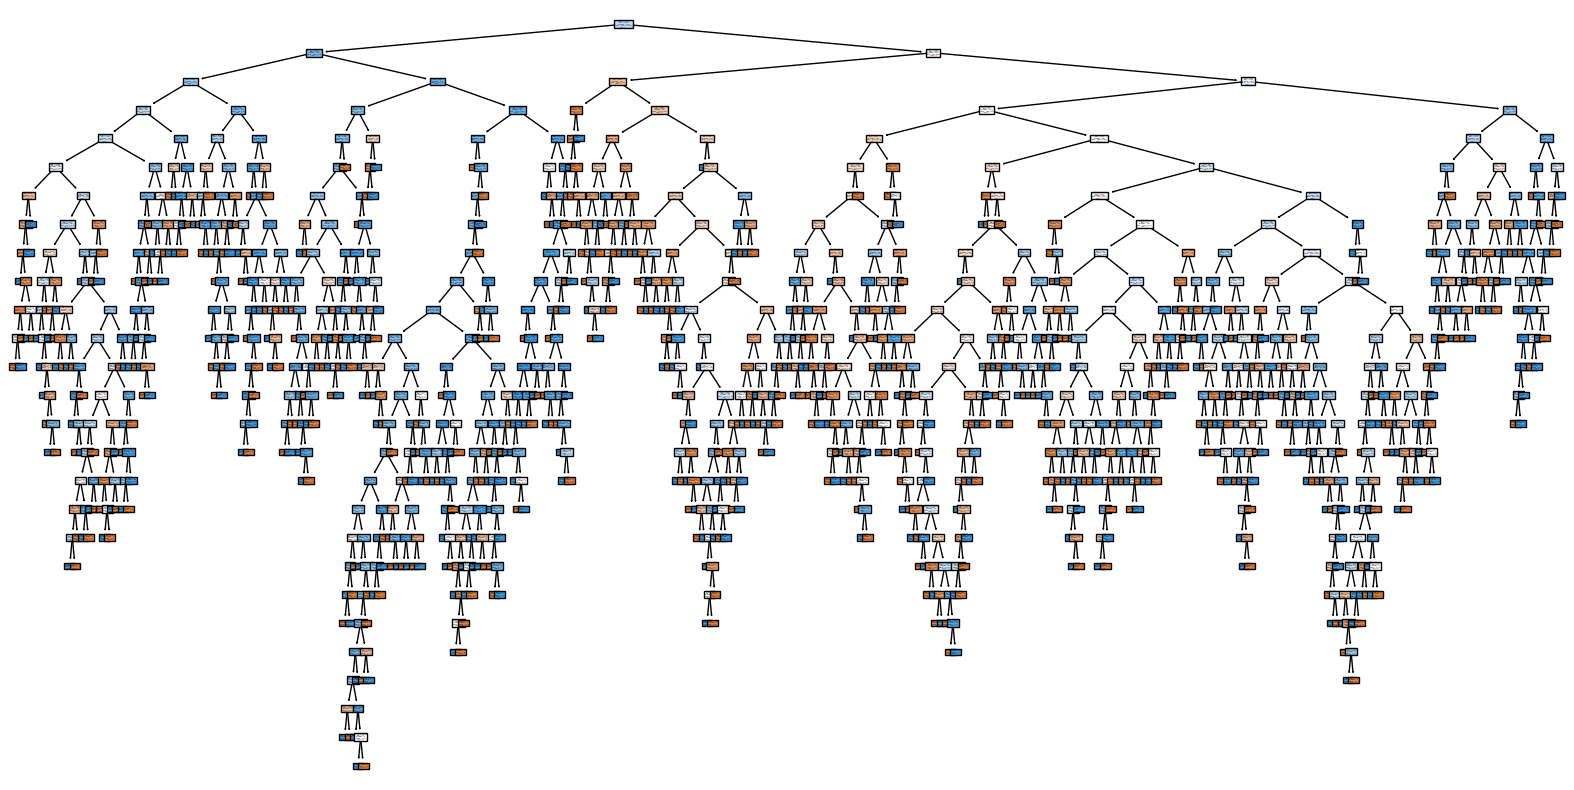

In [44]:
# Previsione sui dati di test
y_pred = model.predict(X_test)


# Calcolo della precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(X_train.columns), class_names=["0","1"], filled=True)
plt.show()

Accuracy after pruning: 0.63


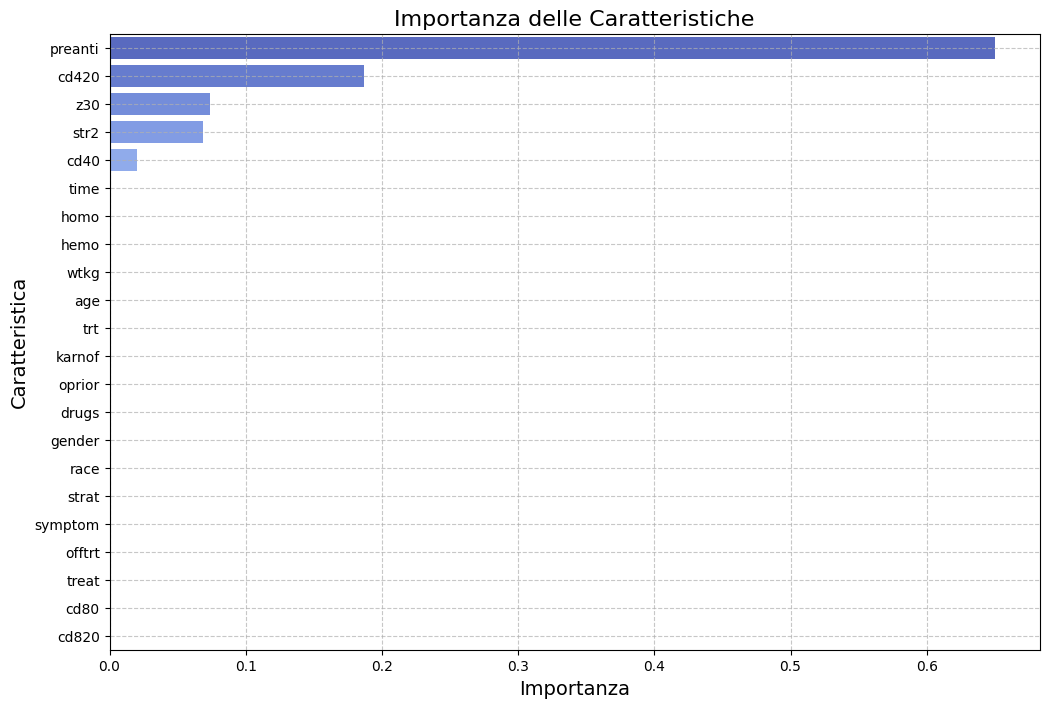

In [45]:
# Model creation with pruning
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')

# Feature importance
importances = model_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [46]:
# Pre pruning
# Model with pre-pruning
model_pre_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)


# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.63


In [47]:
# Post pruning
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


# Find the best alpha
model_pruned = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        model_pruned = model_temp


print(f'Best accuracy after post-pruning: {best_accuracy:.2f}')

Best accuracy after post-pruning: 0.63


In [48]:
# Cross validation with cross validation setted to 15
scores = cross_val_score(model, X, y, cv=15)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.56060606 0.59469697 0.60836502 0.55893536 0.55513308 0.56653992
 0.54752852 0.64258555 0.51711027 0.5513308  0.54372624 0.61596958
 0.57794677 0.58935361 0.57414449]
Mean accuracy: 0.57


In [49]:
best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp

print(f'Best cross-validated accuracy: {best_score:.2f}')

Best cross-validated accuracy: 0.64


In [50]:
# Best model training
best_model.fit(X_train, y_train)

# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.62


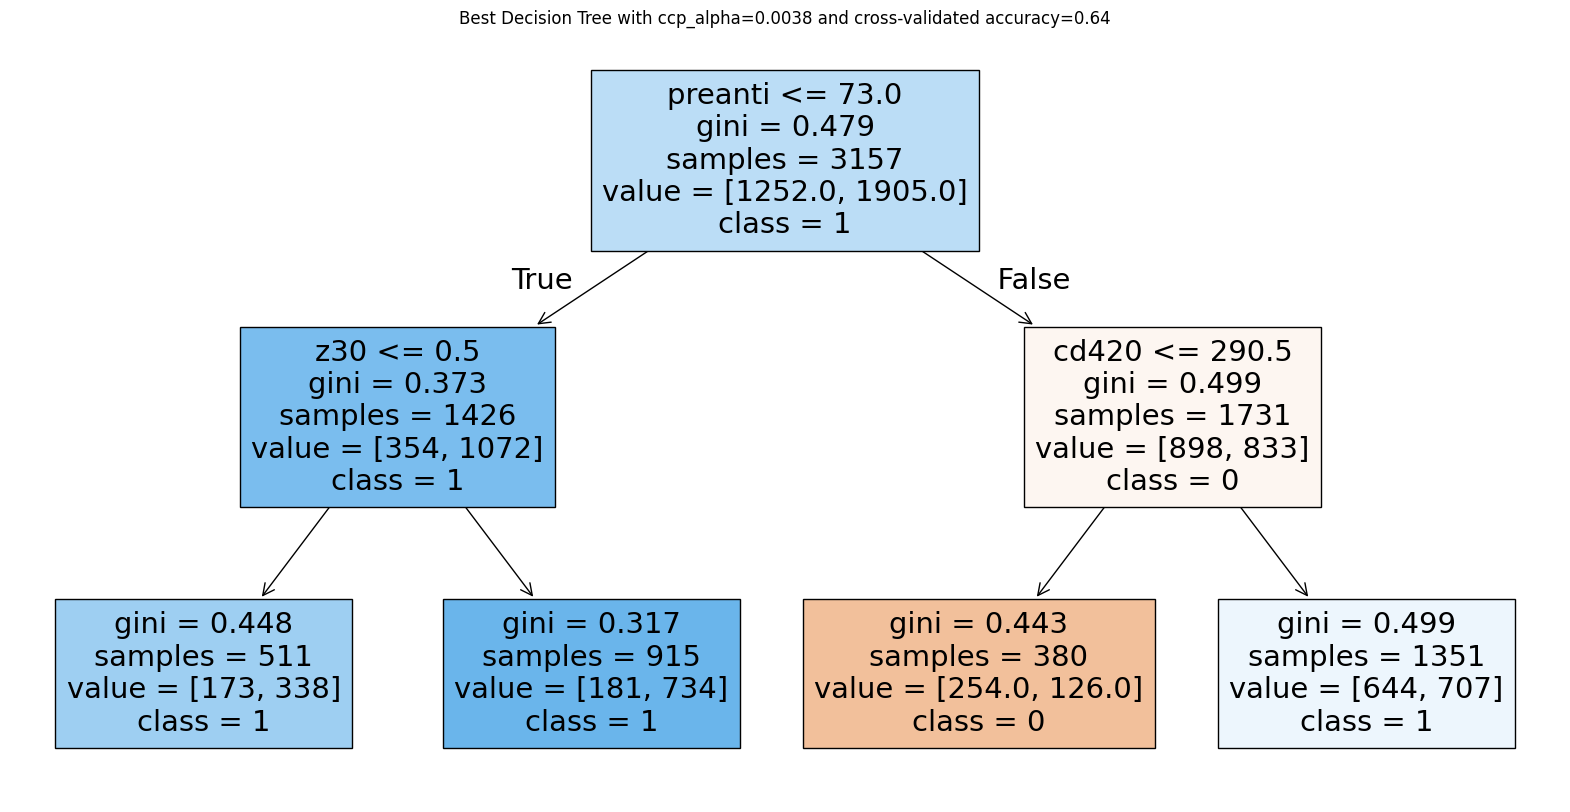

In [51]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={best_model.ccp_alpha:.4f} and cross-validated accuracy={best_score:.2f}')
plt.show()

# RANDOM FOREST

In [52]:
# Select the model
rf_classifier = rfc(n_estimators=600, min_samples_leaf=0.12, random_state=42)

# Fit rf to the training set    
rf_classifier.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the test
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print('Test set accuracy of rf: {:.2f}'.format(accuracy))

Test set accuracy of rf: 0.64


In [53]:
# Define the dictionary 'params_rf'
params_rf = {
            'n_estimators' : [300,600,900],
            'max_features' : ['log2','auto','sqrt'],
            'min_samples_leaf' : [5,30,50]            
}

In [54]:
rf_classifier = rfc()

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf_classifier,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=3,
                       # verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [5, 30, 50],
                         'n_estimators': [300, 600, 900]},
             scoring='accuracy')

In [55]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test Accuracy of best model: {:.3f}'.format(accuracy)) 

Test Accuracy of best model: 0.654
